# Эффективность e-mail рассылок

*Задача*
- Оценить эффективность e-mail рассылок по ключевым метрикам: DR, OR, CTOR, UR.
- Установить наиболее привлекательную тему рассылки.

## Бибилиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

print("Бибилиотеки успешно загружены.")

Бибилиотеки успешно загружены.


## Загрузка данных

In [2]:
try:
    csv_url = 'https://docs.google.com/spreadsheets/d/1nKoe2KtZfFP5x_W7NBSD4zpe0cxNPfkfvUNrZ_hFOxk/export?format=csv&gid=0'
    df = pd.read_csv(csv_url, encoding='utf-8', parse_dates=['Дата'], dayfirst=True)
    print("Данные успешно загружены.")
except:
    print("Ошибка при загрузке.")

Данные успешно загружены.


In [3]:
df.head()

,Название рассылки,Название кампании,Направление,Месяц,Дата,Год,Номер недели,День недели,День недели.1,Время,...,Доставлено,Открытия,Клики,Баунсы (Все ошибки),Отписки,UTM Метка,Пользователей на сайте,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3
0,Название рассылки 1,Название кампании 1,Email,Октябрь,2021-10-27,2021,43,3,03-среда,19:24,...,741 750,148 350,17 802,39 039,7 417,Метка 1,16 378,6337,6210,5154
1,Название рассылки 10,Название кампании 10,Email,Ноябрь,2021-11-05,2021,45,5,05-пятница,12:02,...,683 402,123 012,11 071,35 969,6 834,Метка 10,10 296,3558,3096,2539
2,Название рассылки 100,Название кампании 100,Email,Апрель,2022-04-11,2022,15,1,01-понедельник,16:26,...,1 141 344,182 615,15 340,60 071,11 413,Метка 100,13 959,3370,2864,2263
3,Название рассылки 101,Название кампании 101,Email,Апрель,2022-04-12,2022,15,2,02-вторник,16:26,...,1 324 136,264 827,10 328,69 691,13 241,Метка 101,8 986,5116,4277,3208
4,Название рассылки 102,Название кампании 102,Email,Апрель,2022-04-13,2022,15,3,03-среда,16:26,...,1 212 980,218 336,15 720,63 841,12 130,Метка 102,10 847,2817,2287,1670


## Первичная обработка данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Название рассылки       218 non-null    object        
 1   Название кампании       218 non-null    object        
 2   Направление             218 non-null    object        
 3   Месяц                   218 non-null    object        
 4   Дата                    218 non-null    datetime64[ns]
 5   Год                     218 non-null    int64         
 6   Номер недели            218 non-null    int64         
 7   День недели             218 non-null    int64         
 8   День недели.1           218 non-null    object        
 9   Время                   218 non-null    object        
 10  Веб-версия              218 non-null    object        
 11  Тема письма             218 non-null    object        
 12  Сегмент                 218 non-null    object    

*Комментарий:* 
- Данные представлены в полном объеме, пропуски отсутствуют.
- В столбцах [13...18] содержаться целочисленные значения. В дальнейшем приведем их к соответствующему формату.

In [5]:
# Очистим значения от нечисловых символов и сменим их тип.

cols = df.columns[13:19]
df[cols] = (df[cols]
            .replace(r'\D', '', regex=True)
            .apply(pd.to_numeric, errors='coerce').astype('int64')
           )

df[cols].dtypes

Отправлено             int64
Доставлено             int64
Открытия               int64
Клики                  int64
Баунсы (Все ошибки)    int64
Отписки                int64
dtype: object

In [6]:
# Проверим данные на наличие дубликатов

print("Количество дубликатов -", df.duplicated().sum())

Количество дубликатов - 0


## KPI e-mail-маркетинга

Посчитаем и добавим в датафрейм метрики, выраженные в процентах:
- Delivery Rate (DR),
- Open Rate (OR),
- Click to Open Rate (CTOR),
- Unsubscribe Rate(UR).

In [7]:
df['DR'] = (df['Доставлено'] / df['Отправлено'] * 100).round(2)
df['OR'] = (df['Открытия'] / df['Доставлено'] * 100).round(2)
df['CTOR'] = (df['Клики'] / df['Открытия'] * 100).round(2)
df['UR'] = (df['Отписки'] / df['Доставлено'] * 100).round(2)

df[['DR', 'OR', 'CTOR', 'UR']].head()

,DR,OR,CTOR,UR
0,95.0,20.0,12.0,1.0
1,95.0,18.0,9.0,1.0
2,95.0,16.0,8.4,1.0
3,95.0,20.0,3.9,1.0
4,95.0,18.0,7.2,1.0


Посмотрим на их изменение во времени.

In [8]:
print("Общая статистика по метрикам за все время")
total_stats = df[['DR', 'OR', 'CTOR', 'UR']].describe().round(2)
display(total_stats)

Общая статистика по метрикам за все время


,DR,OR,CTOR,UR
count,218.00,218.00,218.00,218.00
mean,97.65,13.76,8.12,2.47
std,1.08,3.39,2.63,4.17
min,95.00,9.20,3.90,0.15
25%,98.00,11.05,7.20,0.57
50%,98.00,13.99,8.40,0.63
75%,98.50,17.43,9.00,0.90
max,98.50,20.00,12.00,13.00


*Комментарий:* Для UR средний и медианный показатели сильно различаются, что говорит о сильно выбиваюихся значениях. Отличия для других показателей не столь существены. Рассмотрим и среднее арифметическое, и медианное значение.

In [9]:
# Сводная таблица с агрегацией метрик по месяцам и годам
kpi_s = df.groupby(['Год', 'Месяц']).agg({
    'DR': ['mean', 'median'],
    'OR': ['mean', 'median'],
    'CTOR': ['mean', 'median'],
    'UR': ['mean', 'median']
}).round(2)

kpi_s.columns = ['DR_mean','DR_median','OR_mean', 'OR_median', 'CTOR_mean', 'CTOR_median', 'UR_mean', 'UR_median']
kpi_s = kpi_s.reset_index()

month_order = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
               'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

kpi_s['Месяц'] = pd.Categorical(kpi_s['Месяц'], 
                                categories=month_order, 
                                ordered=True)
kpi_s = kpi_s.sort_values(['Год', 'Месяц'])

kpi_s

,Год,Месяц,DR_mean,DR_median,OR_mean,OR_median,CTOR_mean,CTOR_median,UR_mean,UR_median
1,2021,Апрель,95.00,95.0,15.01,14.41,8.10,8.4,0.69,0.69
5,2021,Май,95.88,95.0,15.16,15.18,9.15,8.7,0.63,0.63
4,2021,Июнь,98.17,98.0,15.29,15.95,8.08,8.4,0.62,0.62
3,2021,Июль,98.08,98.0,14.84,14.41,7.65,8.4,0.60,0.60
0,2021,Август,98.17,98.0,15.49,17.43,7.40,7.8,0.56,0.57
8,2021,Сентябрь,97.57,97.0,12.43,11.05,8.53,8.4,0.57,0.58
7,2021,Октябрь,97.13,97.0,14.22,14.00,8.22,8.4,2.09,0.57
6,2021,Ноябрь,97.70,98.0,13.86,13.98,8.18,8.4,2.85,0.59
2,2021,Декабрь,98.16,98.0,13.34,11.05,7.94,8.4,5.11,0.57
13,2022,Январь,98.15,98.0,12.79,11.05,8.25,8.4,3.96,0.90


In [10]:
# Определим функцию, которая на вход принимает датасет и название метрики,
# а на выходе строит помесячный график среднего и медианного значений
def plot_metric(data, metric_name):
    plt.figure(figsize=(10, 4))
    
    x = range(len(data))
    width = 0.35
    
    plt.bar(x, data[f'{metric_name}_mean'], width, label='Среднее')
    plt.bar([i + width for i in x], data[f'{metric_name}_median'], width, label='Медиана')
    
    plt.title(metric_name)
    plt.xticks([i + width/2 for i in x], [f"{row['Год']}-{row['Месяц']}" for _, row in data.iterrows()], rotation=45)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

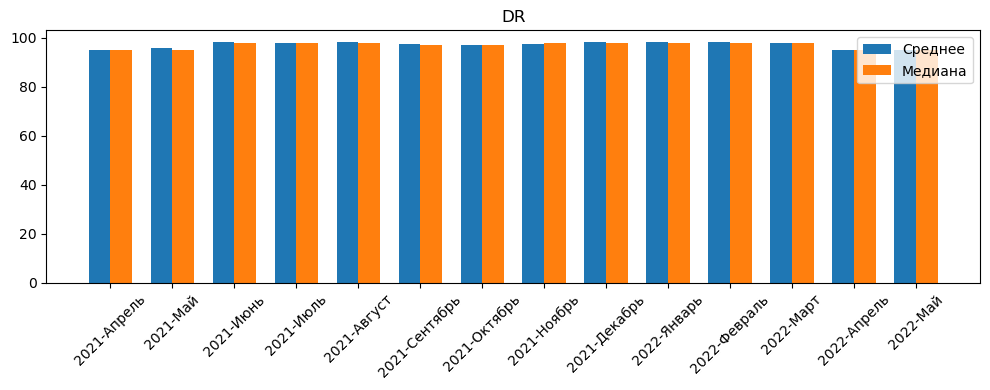

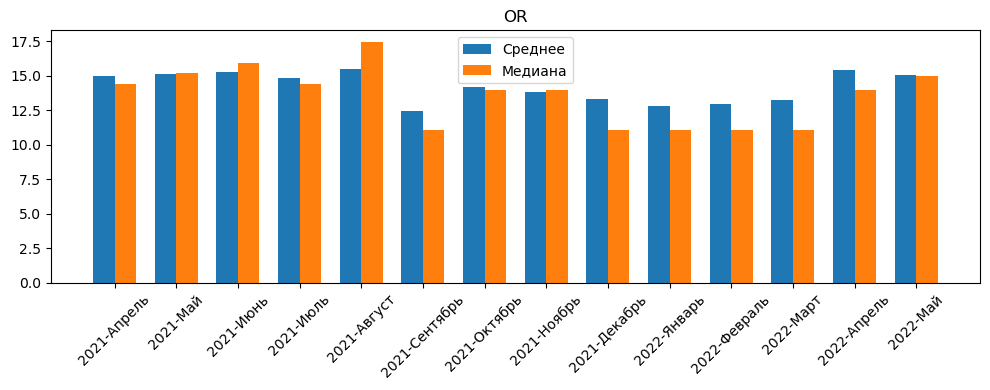

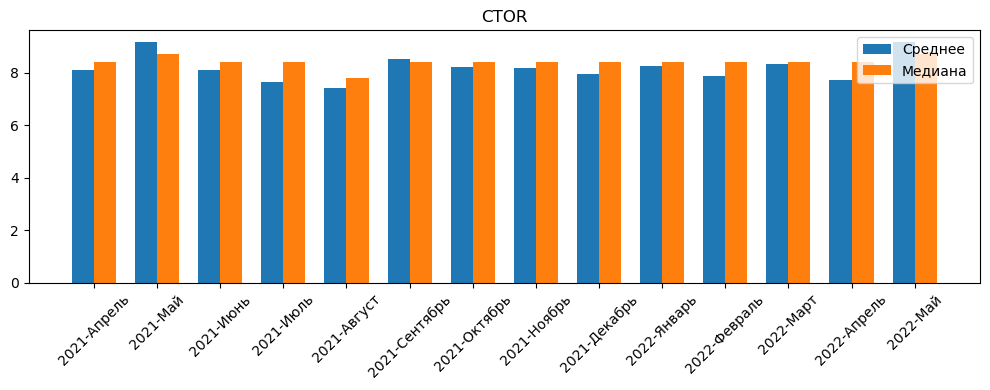

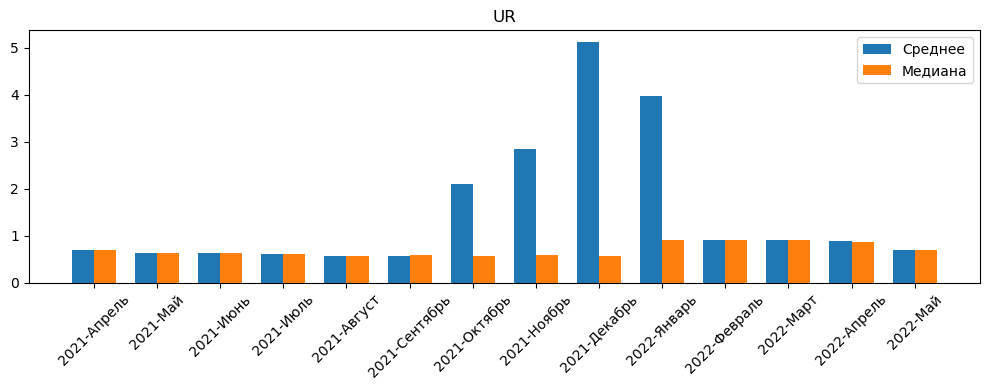

In [11]:
# Визуализируем агрегированные по месяцам метрики
plot_metric(kpi_s, 'DR')
plot_metric(kpi_s, 'OR')
plot_metric(kpi_s, 'CTOR')
plot_metric(kpi_s, 'UR')

*Комментарий:* Медианное и среднее значние имеют критические рахсождения для UR в период октябрь 2021 - январь 2022. В данных присутствуют высокие значения отписок, что требует дополнительного исследования для установления возможных причин.

## Исследование лучшей темы

In [12]:
# Получим корректные названия столбцов для дальнейшего использования
df.columns

Index(['Название рассылки', 'Название кампании', 'Направление', 'Месяц',
       'Дата', 'Год', 'Номер недели', 'День недели', 'День недели.1', 'Время',
       'Веб-версия', 'Тема письма ', 'Сегмент ', 'Отправлено', 'Доставлено',
       'Открытия', 'Клики', 'Баунсы (Все ошибки)', 'Отписки', 'UTM Метка',
       'Пользователей на сайте', 'Воронка продаж. Шаг 1',
       'Воронка продаж. Шаг 2', 'Воронка продаж. Шаг 3', 'DR', 'OR', 'CTOR',
       'UR'],
      dtype='object')

In [13]:
# Группируем по теме письма для анализа эффективности тем
kpi_vs_theme = df.groupby('Тема письма ').agg({
    'Отправлено': ['sum'],
    'DR': ['mean'],
    'OR': ['mean'],
    'CTOR': ['mean'],
    'UR': ['mean']
}).round(2)

kpi_vs_theme.columns = [
    'Количество_получателей',
    'DR_mean',
    'OR_mean', 
    'CTOR_mean',
    'UR_mean'
]

kpi_vs_theme = (kpi_vs_theme
                .reset_index()
                .sort_values(['DR_mean', 'OR_mean', 'CTOR_mean', 'Количество_получателей'], ascending=False)
               )

print(f"Всего уникальных тем: {len(kpi_vs_theme)}\
    \nТоп-10 используемых с максимальными KPI (не считая отписки)")
kpi_vs_theme.head(10)

Всего уникальных тем: 218    
Топ-10 используемых с максимальными KPI (не считая отписки)


,Тема письма,Количество_получателей,DR_mean,OR_mean,CTOR_mean,UR_mean
135,Тема письма 24,1042456,98.5,18.00,12.0,13.00
171,Тема письма 57,1722650,98.5,18.00,9.0,0.90
207,Тема письма 9,635111,98.5,18.00,8.4,0.90
117,Тема письма 204,542459,98.5,18.00,8.4,0.25
99,Тема письма 189,2131798,98.5,18.00,7.2,0.58
189,Тема письма 73,1026345,98.5,18.00,7.2,0.90
153,Тема письма 40,2175402,98.5,18.00,3.9,11.00
120,Тема письма 207,2289758,98.5,17.43,12.0,0.28
105,Тема письма 194,1639899,98.5,17.43,12.0,0.34
210,Тема письма 92,1509215,98.5,17.43,12.0,0.90


In [14]:
# Темы с высоким OR но низким UR
print("Темы с высоким Open Rate и низким Unsubscribe Rate")
or_vs_ur = kpi_vs_theme[
    (kpi_vs_theme['OR_mean'] > kpi_vs_theme['OR_mean'].median()) &
    (kpi_vs_theme['UR_mean'] < kpi_vs_theme['UR_mean'].median())
].sort_values(['OR_mean', 'UR_mean'], ascending=[False, True])

or_vs_ur[['Тема письма ', 'OR_mean', 'UR_mean', 'Количество_получателей']].head(10)

Темы с высоким Open Rate и низким Unsubscribe Rate


,Тема письма,OR_mean,UR_mean,Количество_получателей
127,Тема письма 213,18.0,0.15,877792
117,Тема письма 204,18.0,0.25,542459
119,Тема письма 206,18.0,0.29,838103
101,Тема письма 190,18.0,0.34,1478133
109,Тема письма 198,18.0,0.34,2107380
83,Тема письма 174,18.0,0.50,2225984
73,Тема письма 165,18.0,0.50,873482
91,Тема письма 181,18.0,0.57,961202
52,Тема письма 146,18.0,0.57,573276
81,Тема письма 172,18.0,0.57,562512


*Комментарий:* 
- Количество адресатов в рассылках имеет разный порядок для разных тем. Однако среди топ-10 по метрикам большие разбежки встречатся в 2-3 случаях, что позволяет сравнивать оставшиеся 7-8.
- Следует быть внимательными с темами писем, некоторые из них, хотя и имеют высокие показатели открытия, могут повлечь также и высокие показатели отписки.

## Выводы

1. **Метрики в динамике.** В целом показатели достаточно стабильны. Однако стоит тщательно проанализировать период октябрь 2021 - январь 2022, в который были единичные случаи критически высоких показателей UR. В последние месяцы также наблюдается повышенный уровень отписок.
2. **Наилучшая тема рассылки** определяется целями кампании. Лучший выбор — Тема 207. Она даёт максимальную конверсию (CTOR 12%) и низкие отписки (UR 0.28%) при охвате 2.3 млн человек. Для сохранения аудитории эффективнее Тема 213 — отписки всего 0.15% при открытиях 18%. Важно учесть, что тема с наивысшим CTOR (Тема 24) имеет критичный UR (13%) и несет высокий риск массовых отписок.